# Text Sentiment Analysis

In [ ]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19231/1413778/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1599391753&Signature=ILICjDaFQc71Sn14HoydAPtb7F4PRSdAubN6tdZmwjbMyhWMgle1bOsqYzeao0UOUsMb6uef6ojfZu5ZvSODT25qbkl43Xmo29NUtv1KJ%2BIVwcicvRNd95Jnr3GYbEOwF1yApJY8lo1z6H7k7ngVkX%2BC9PBXEq08SlfHkpvXXd2%2FjjIT9wK7%2B3kClfBjQJeg%2BUkcdSgBuEaJnsNUbzukOhmyF9B3L5lUkD%2BtWfwO%2Fu%2FIPzP8bTCZLIO4KbVIKGc%2Fe8FuecJ7%2FH8dev75NX8J52KSt%2BuOCAbaXMGNT11erDbVL0ewsje%2B93F%2FCJoHsphdiA%2BF6bYpZ9tkbRBkL4%2BYUw%3D%3D&response-content-disposition=attachment%3B+filename%3Dlandmark-recognition-2020.zip" -c -O 'CurlWget404'

--2020-09-03 11:29:30--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19231/1413778/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1599391753&Signature=ILICjDaFQc71Sn14HoydAPtb7F4PRSdAubN6tdZmwjbMyhWMgle1bOsqYzeao0UOUsMb6uef6ojfZu5ZvSODT25qbkl43Xmo29NUtv1KJ%2BIVwcicvRNd95Jnr3GYbEOwF1yApJY8lo1z6H7k7ngVkX%2BC9PBXEq08SlfHkpvXXd2%2FjjIT9wK7%2B3kClfBjQJeg%2BUkcdSgBuEaJnsNUbzukOhmyF9B3L5lUkD%2BtWfwO%2Fu%2FIPzP8bTCZLIO4KbVIKGc%2Fe8FuecJ7%2FH8dev75NX8J52KSt%2BuOCAbaXMGNT11erDbVL0ewsje%2B93F%2FCJoHsphdiA%2BF6bYpZ9tkbRBkL4%2BYUw%3D%3D&response-content-disposition=attachment%3B+filename%3Dlandmark-recognition-2020.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.112.128, 172.217.212.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104894484528 (98G) [application/zip]
Saving to: ‘CurlW

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   31G   73G  30% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.9G     0  5.9G   0% /dev/shm
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       114G   32G   83G  28% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install fasttext

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import time
import datetime
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score
import sklearn.metrics

import fasttext
import gc

## 1. Loading the data

In [ ]:
dir = '/content/drive/My Drive/Sentiment Analysis'

In [ ]:

"""
Socher, R., Perelygin, A., Wu, J. Y., Chuang, J., Manning, C. D., Ng, A. Y., & Potts, C. (2013). Recursive Deep Models
for Semantic Compositionality Over a Sentiment Treebank. Presented at the Conference on Empirical Methods in Natural
Language Processing EMNLP.

https://nlp.stanford.edu/sentiment/
"""

def get_phrase_sentiments(data_path):

    dictionary = pd.read_csv(os.path.join(data_path, "dictionary.txt"), sep="|")
    dictionary.columns = ["phrase", "id"]
    dictionary = dictionary.set_index("id")

    sentiment_labels = pd.read_csv(os.path.join(data_path, "sentiment_labels.txt"), sep="|")
    sentiment_labels.columns = ["id", "sentiment"]
    sentiment_labels = sentiment_labels.set_index("id")

    phrase_sentiments = dictionary.join(sentiment_labels)

    phrase_sentiments["label"] = pd.cut(phrase_sentiments.sentiment, [0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                           include_lowest=True,
                                           labels=["very negative", "negative", "neutral", "positive", "very positive"]).astype('category')
    return phrase_sentiments


data = get_phrase_sentiments(dir)
print(data.shape)
data.head()


(239231, 3)


,phrase,sentiment,label
id,,,
22935,! ',0.52778,neutral
18235,! '',0.50000,neutral
179257,! Alas,0.44444,neutral
22936,! Brilliant,0.86111,very positive
40532,! Brilliant !,0.93056,very positive


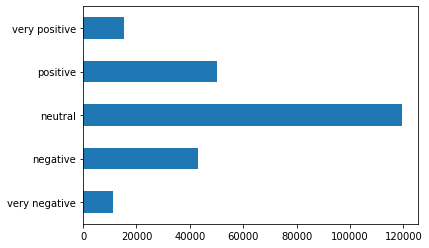

In [ ]:
data['label'].value_counts(sort=False).plot(kind='barh')
plt.show()

**Dataset is imbalanced. There are very few instances of strongy polar(very positive, very negative) sentiments whereas neutral sentiment instances are dominant.**

## 2. Data Cleaning

In [ ]:
import re
from tqdm import tqdm
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
preprocessed_phrases = []
# tqdm is for printing the status bar
for phrase in tqdm(data['phrase'].values):
    ph = decontracted(phrase)
    ph = ph.replace('\\r', ' ')
    ph = ph.replace('\\"', ' ')
    ph = ph.replace('\\n', ' ')
    ph = ph.replace('\'', '')
    ph = ph.replace('\"', '')
    

    preprocessed_phrases.append(ph.lower().strip())

100%|██████████| 239231/239231 [00:02<00:00, 91533.22it/s]


In [ ]:
data['cleaned_phrase'] = preprocessed_phrases

## 3. Exploratory Data Analysis

In [ ]:
data['phrase_len'] = data['cleaned_phrase'].apply(lambda x: len(x))
data.head()

,phrase,sentiment,label,cleaned_phrase,phrase_len
id,,,,,
22935,! ',0.52778,neutral,!,1
18235,! '',0.50000,neutral,!,1
179257,! Alas,0.44444,neutral,! alas,6
22936,! Brilliant,0.86111,very positive,! brilliant,11
40532,! Brilliant !,0.93056,very positive,! brilliant !,13


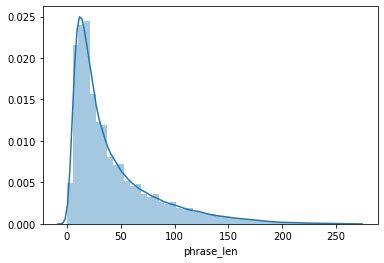

In [ ]:
sns.distplot(data['phrase_len'])
plt.show()


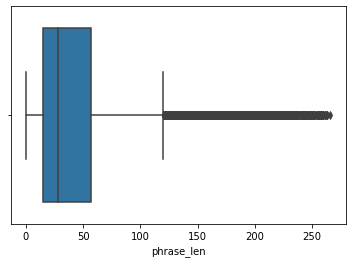

In [ ]:
sns.boxplot(data['phrase_len'])

**It is evident from the above plots that most of the phrases are not longer than 60-70 characters**

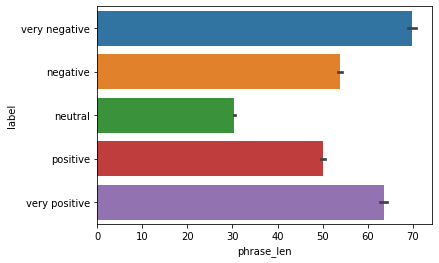

In [ ]:
sns.barplot(y='label', x='phrase_len', data=data)
plt.show()

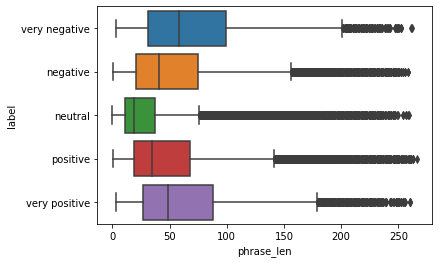

In [ ]:
sns.boxplot(y='label', x='phrase_len', data=data)
plt.show()

**Neutral phrases, in general, are shorter and highly polar phrases are longer.** 

In [ ]:
def plot_wordcloud(label : str):
    words = ""
    for phrase in data[data.label==label]['cleaned_phrase']:
        tokens = str(phrase).split()
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()
        words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 800, height = 500, 
                    stopwords = STOPWORDS, 
                    min_font_size = 10).generate(words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 18), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title('Most frequent words in \'%s\' phrases' %label)

    plt.show() 

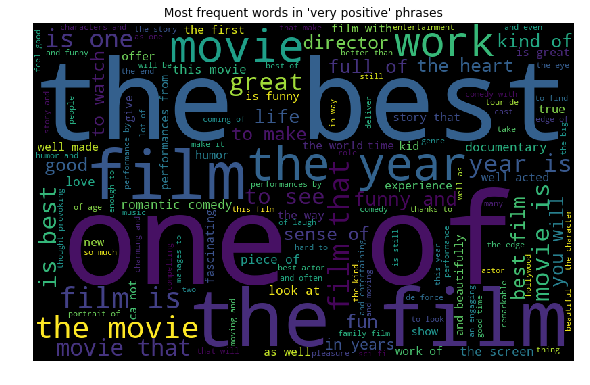

In [ ]:
plot_wordcloud('very positive')

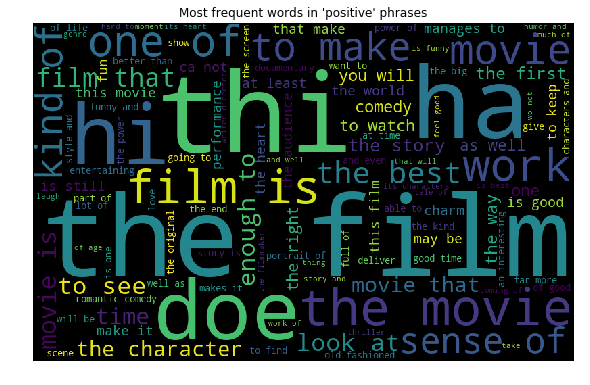

In [ ]:
plot_wordcloud('positive')

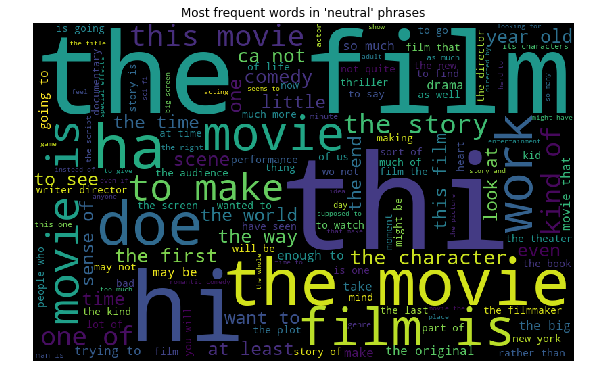

In [ ]:
plot_wordcloud('neutral')

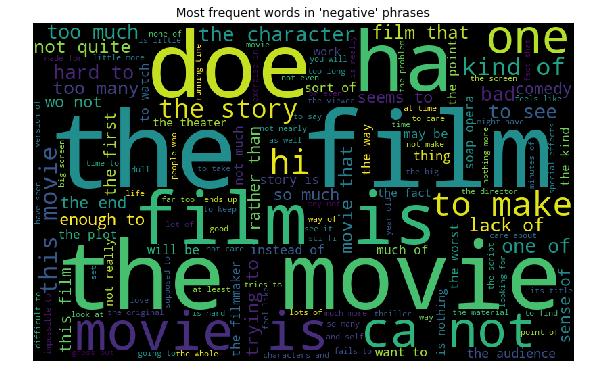

In [ ]:
plot_wordcloud('negative')

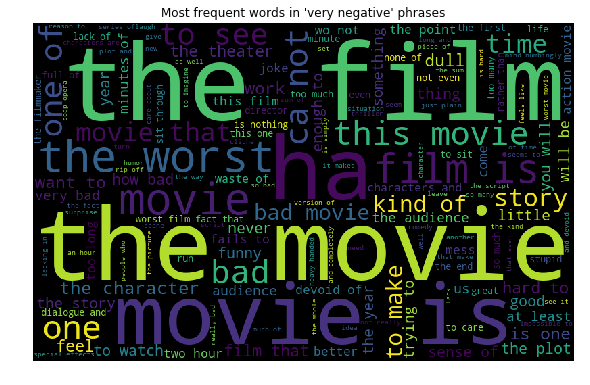

In [ ]:
plot_wordcloud('very negative')

- **In positive phrases, words like <font color='green'>*'great', 'best', 'good', 'love', 'heart'*</font>, etc. are more frequent.**
- **In negative phrases, we find negative words like <font color='red'>*'bad', 'not quite', 'lack of', 'worst', 'dull'*</font>, etc. more often**
- **Polar words are very rare in neutral phrases.**

## 4. Data Preparation

### 4.1. Train, test split

In [ ]:
labels = data[['label']]
data.drop(['phrase', 'sentiment', 'label'], axis=1, inplace=True)
data.head()

,cleaned_phrase,phrase_len
id,,
22935,!,1
18235,!,1
179257,! alas,6
22936,! brilliant,11
40532,! brilliant !,13


In [ ]:
train, test, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
train, val, train_labels, val_labels = train_test_split(train, train_labels, test_size=0.15, random_state=42, stratify=train_labels)
print('Train, test, validation shape: ', train.shape, test.shape, val.shape)

Train, test, validation shape:  (162676, 2) (47847, 2) (28708, 2)


### 4.2. Standardizing numerical features

In [ ]:
train.head()

,cleaned_phrase,phrase_len
id,,
112591,a reason the studio did not offer an advance ...,110
140251,with the courage to go over the top and movies...,83
84052,is at once a tough pill to swallow and a minor...,75
135274,the field of roughage,21
150565,undercover brother does not go far enough . i...,84


In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardizing price
scaler = StandardScaler()
scaler.fit(train['phrase_len'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {scaler.mean_[0]}, Standard deviation : {np.sqrt(scaler.var_[0])}")

# Now standardize the data with above maen and variance.
train['phrase_len'] = scaler.transform(train['phrase_len'].values.reshape(-1, 1))
val['phrase_len'] = scaler.transform(val['phrase_len'].values.reshape(-1, 1))
test['phrase_len'] = scaler.transform(test['phrase_len'].values.reshape(-1, 1))

Mean : 42.77790208758514, Standard deviation : 40.08522278172869


In [ ]:
train.head()

,cleaned_phrase,phrase_len
id,,
112591,a reason the studio did not offer an advance ...,1.676980
140251,with the courage to go over the top and movies...,1.003415
84052,is at once a tough pill to swallow and a minor...,0.803840
135274,the field of roughage,-0.543290
150565,undercover brother does not go far enough . i...,1.028361


### 4.2. Converting text features into vectors

In [ ]:
# Download dan unzip model
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

--2020-08-10 12:36:37--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G  11.3MB/s    in 6m 23s  

2020-08-10 12:43:01 (11.2 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
!gunzip -k cc.en.300.bin.gz

In [ ]:
# Loading pretrained fastetxt model
import fasttext

model = fasttext.load_model("cc.en.300.bin")
model.get_sentence_vector('king is mad').shape

(300,)

In [ ]:
headers = ['id', 'phrase_len']
for i in range(1,301):
    headers.append('f_{}'.format(i))
print(headers)

def get_vectors(dataset : pd.DataFrame, filename : str):
    '''This function computes 300 dimensional word embeddings, using fasttext model pretrained on Common Crawl English data,
    for text feature 'phrase' and saves them to a .csv file.
        args:
            dataset : pandas dataframe containing preprocessed data.
            fileneame : destination file name e.g. train.csv
    '''
    with open(os.path.join(dir, filename), 'w+') as f:
        f.write(','.join(headers))
        f.write('\n')
        for index, row in dataset.iterrows():
            f.write('{0},{1},'.format(index, row['phrase_len']))
            word_vec = model.get_sentence_vector(row['cleaned_phrase'])
            f.write(','.join(list(map(str, word_vec))))
            f.write('\n')
    f.close()

['id', 'phrase_len', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99', 'f_100', 'f_101', 'f_102', 'f_103', 'f_104', 'f_105', 'f_106', 'f_107', 'f_108', 'f_109', 'f_110', 'f_111', 'f_112', 'f_113', 'f_114', 'f_115', 'f_116', 'f_117', 'f_118', 'f_119', 'f_120', 'f_121'

In [ ]:
get_vectors(train, 'train.csv')
get_vectors(val, 'val.csv')
get_vectors(test, 'test.csv')

### 4.3. Label encoding target variable

In [ ]:
label_ids = {'very negative':1, 'negative':2, 'neutral':3, 'positive':4, 'very positive':5}

train_labels['label'] = train_labels['label'].apply(lambda x: label_ids[x])
val_labels['label']= val_labels['label'].apply(lambda x: label_ids[x])
test_labels['label']= test_labels['label'].apply(lambda x: label_ids[x])

train_labels.to_csv(dir + '/train_labels.csv')
val_labels.to_csv(dir + '/val_labels.csv')
test_labels.to_csv(dir + '/test_labels.csv')

## 5. Modeling

In [ ]:
def load_saved_data(filename):
    return pd.read_csv(os.path.join(dir, filename), index_col='id')
X_train = load_saved_data('train.csv')
X_val = load_saved_data('val.csv')
X_test = load_saved_data('test.csv')

In [ ]:
train_labels = pd.read_csv(dir + '/train_labels.csv', index_col='id')
val_labels = pd.read_csv(dir + '/val_labels.csv', index_col='id')
test_labels = pd.read_csv(dir + '/test_labels.csv', index_col='id')

In [ ]:
train_labels.head()

,label
id,
112591,2
140251,3
84052,4
135274,3
150565,2


In [ ]:
X_train.head()

,phrase_len,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_261,f_262,f_263,f_264,f_265,f_266,f_267,f_268,f_269,f_270,f_271,f_272,f_273,f_274,f_275,f_276,f_277,f_278,f_279,f_280,f_281,f_282,f_283,f_284,f_285,f_286,f_287,f_288,f_289,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299,f_300
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
112591,1.676980,-0.006110,-0.024766,-0.005442,0.028699,-0.027780,-0.003268,0.024928,-0.019480,0.002170,0.014949,-0.029877,-0.015387,-0.007826,-0.003728,0.005981,0.031761,0.006197,-0.012559,-0.030212,0.011004,-0.022351,0.003368,0.002411,0.007516,-0.037461,-0.041844,-0.013960,0.005641,0.003385,0.054327,-0.019656,-0.015536,-0.006999,-0.048528,0.002851,-0.004996,0.008805,-0.017470,-0.002059,...,-0.005969,0.002343,-0.005763,-0.005145,-0.010747,-0.011268,0.012702,-0.030573,0.028333,-0.041337,-0.023617,-0.014529,0.005697,-0.013874,0.019726,-0.022187,-0.038264,-0.003412,-0.007002,0.004480,-0.013402,0.012382,-0.091597,-0.019049,-0.001519,-0.021592,-0.000234,-0.028260,-0.019864,-0.003286,0.047193,0.010580,-0.070639,0.023688,-0.010755,0.009986,-0.008876,0.090957,-0.038795,-0.005464
140251,1.003415,-0.019718,0.004494,0.010181,0.062053,-0.062143,-0.026119,0.004722,-0.015085,-0.021240,-0.005239,-0.003579,-0.001042,-0.001197,0.004581,-0.006996,-0.019892,0.018406,0.007833,-0.042963,0.046803,0.013416,0.007161,0.003218,-0.013791,-0.022060,-0.032828,-0.006645,0.001010,-0.017736,0.035534,-0.014138,-0.016700,0.005424,-0.031608,0.005294,-0.010319,-0.020268,0.046712,-0.011485,...,0.008109,0.014261,-0.009035,0.017446,-0.009453,0.010657,0.018137,0.026769,-0.029986,-0.032640,-0.004534,-0.014306,-0.058024,-0.010253,0.007173,0.010152,0.002927,-0.010487,-0.052508,0.023399,0.002576,0.014854,-0.107195,-0.016093,0.020593,-0.002748,0.025131,-0.044150,-0.033402,0.008431,0.030922,-0.006704,-0.060135,0.004670,-0.008991,0.011085,0.003074,0.069025,-0.005038,0.000887
84052,0.803840,0.015762,-0.027762,0.001930,0.009366,-0.038311,-0.014005,0.037069,-0.007377,-0.011301,-0.002033,-0.004795,-0.003255,0.003369,-0.003872,-0.012222,0.025483,-0.010789,-0.006590,-0.016732,0.025338,0.001390,0.018109,-0.005731,-0.010040,-0.019926,-0.020076,0.000158,-0.008793,-0.011505,0.054678,0.013088,-0.017938,0.031459,-0.022461,0.007939,-0.004354,-0.000168,-0.008342,0.020635,...,-0.007961,0.013936,-0.020285,-0.008238,-0.003395,0.010036,0.022287,-0.005311,0.019371,-0.027427,-0.035919,-0.026931,0.006226,0.017586,0.006158,-0.005545,-0.035318,0.001791,0.020279,0.024150,0.013817,0.034629,-0.060321,-0.020076,0.018307,-0.007144,0.007292,-0.009323,-0.022297,-0.013450,0.037870,0.003519,-0.059850,0.004265,-0.021855,-0.017606,0.008589,0.077832,-0.010555,0.002342
135274,-0.543290,-0.014219,0.021835,-0.002238,0.004658,-0.015518,-0.019597,0.045643,-0.016385,-0.003022,-0.030184,-0.026777,0.006904,0.039853,0.019025,-0.036035,-0.040967,0.006980,-0.023057,-0.014831,-0.013326,-0.033780,0.005275,0.011908,0.031056,-0.025509,-0.033737,-0.024767,0.032963,-0.025955,0.069386,-0.012039,-0.025013,-0.001121,-0.078136,-0.014732,-0.000473,0.025182,0.043908,0.003032,...,0.005017,-0.052489,-0.021102,0.016490,0.009145,0.027531,-0.002430,-0.004153,-0.021011,0.011731,-0.009418,-0.047879,-0.003138,-0.059115,0.004027,-0.017058,0.005874,-0.076704,0.002943,-0.011470,0.033342,0.018869,-0.077702,-0.048016,-0.006866,-0.002447,-0.002762,0.027027,0.009325,0.015451,-0.014520,0.030394,-0.029358,0.025848,0.004721,-0.077826,-0.039569,0.070618,-0.019196,-0.008710
150565,1.028361,-0.003499,-0.018896,-0.008258,0.031762,-0.031175,-0.012605,0.037188,-0.020077,-0.000399,-0.005207,-0.003240,-0.007846,-0.006111,0.003879,-0.013688,0.062346,0.014984,-0.014525,-0.027052,0.024833,0.003923,0.019501,-0.001625,-0.005124,-0.022776,-0.023723,-0.003173,0.002168,-0.010146,0.067598,-0.016457,0.007168,-0.017870,0.008795,0.021023,-0.012978,-0.

### 5.1. Logistic Regression

In [ ]:
c_vals = [0.001, 0.01, 0.03, 0.1, 0.3, 1, 10]
scores = ([], [])
for c in c_vals:
    lr = LogisticRegression(C=c, random_state=42 )
    lr.fit(X_train, train_labels)

    pred = val_pred = lr.predict(X_train)
    train_acc = accuracy_score(train_labels, pred)

    pred = val_pred = lr.predict(X_val)
    val_acc = accuracy_score(val_labels, pred)
    print('For C={0}, validation accuracy: {1}'.format(c, val_acc))
    scores[0].append(train_acc)
    scores[1].append(val_acc)

For C=0.001, validation accuracy: 0.5149087362407692
For C=0.01, validation accuracy: 0.5589034415493939
For C=0.03, validation accuracy: 0.5733941758394873
For C=0.1, validation accuracy: 0.58300822070503
For C=0.3, validation accuracy: 0.587257907203567
For C=1, validation accuracy: 0.5890692489898286
For C=10, validation accuracy: 0.588825414518601


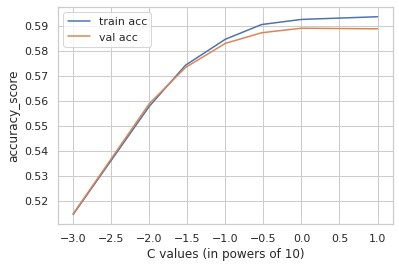

In [ ]:
sns.set(style='whitegrid')
plt.plot(np.log10(c_vals), scores[0], label='train acc')
plt.plot(np.log10(c_vals), scores[1], label='val acc')
plt.xlabel('C values (in powers of 10)')
plt.ylabel('accuracy_score')
plt.legend()
plt.show()

In [ ]:
lr = LogisticRegression(C=1, random_state=42 )
lr.fit(X_train, train_labels)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(X_val)
print('Validation accuracy: {:.3f}'.format(accuracy_score(val_labels, pred)))
pred = lr.predict(X_test)
print('Test accuracy: {:.3f}'.format(accuracy_score(test_labels, pred)))

Validation accuracy: 0.588
Test accuracy: 0.595


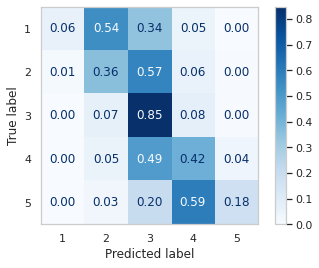

In [ ]:
sklearn.metrics.plot_confusion_matrix(lr, X_val, val_labels, normalize='true', cmap='Blues', values_format='.2f')
plt.grid(b=False)

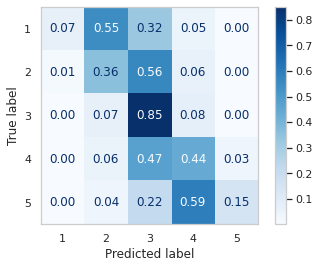

In [ ]:
# Test confusion matrix
sklearn.metrics.plot_confusion_matrix(lr, X_test, test_labels, normalize='true', cmap='Blues', values_format='.2f')
plt.grid(b=False)

### 5.2 SVM

In [ ]:
c_vals = [0.001, 0.01, 0.03, 0.1, 0.3, 1, 10]
scores = ([], [])
for c in c_vals:
    svc = SVC(C=c, max_iter=1000, random_state=42 )
    svc.fit(X_train, train_labels)

    pred = val_pred = svc.predict(X_train)
    train_acc = accuracy_score(train_labels, pred)

    pred = val_pred = svc.predict(X_val)
    val_acc = accuracy_score(val_labels, pred)
    print('For C={0}, validation accuracy: {1}'.format(c, val_acc))
    scores[0].append(train_acc)
    scores[1].append(val_acc)

### 5.3. XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='gpu_hist')
prams={'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
       'n_estimators':[100,200,500,1000,2000],
       'max_depth':[3,5,10],
       'colsample_bytree':[0.1,0.3,0.5,1],
       'subsample':[0.1,0.3,0.5,1]
       }
random_cv = RandomizedSearchCV(xgb, param_distributions=prams, cv=3, verbose=8)
rand_clf = random_cv.fit(X_train, train_labels)
print(rand_clf.best_estimator_)

## 6. Loading and predicting on Amazon phone reviews data

In [ ]:
reviews = pd.read_csv(dir+'/Amazon_phone_reviews.csv')
reviews.head()

,product_name,review
0,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Defective product shipped.. reported within a ...
1,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Nice phone camera better attractive look
2,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Design-GoodCamera-NiceDisplay-satisfactoryBatt...
3,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",The headphone jack is not working 😡 Despite t...
4,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...","First sell, First order. Mobile is very nice..."


### 6.1. Cleaning data

In [ ]:
import re
from tqdm import tqdm
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
preprocessed_rev = []
# tqdm is for printing the status bar
for phrase in tqdm(reviews['review'].values):
    ph = decontracted(phrase)
    ph = ph.replace('\\r', ' ')
    ph = ph.replace('\\"', ' ')
    ph = ph.replace('\\n', ' ')
    ph = ph.replace('\'', '')
    ph = ph.replace('\"', '')
    

    preprocessed_rev.append(ph.lower().strip())

100%|██████████| 9004/9004 [00:00<00:00, 63392.61it/s]


In [ ]:
reviews['cleaned_review'] = preprocessed_rev
reviews['rev_len'] = reviews['cleaned_review'].apply(lambda x: len(x))
reviews.head()

,product_name,review,cleaned_review,rev_len
0,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Defective product shipped.. reported within a ...,defective product shipped.. reported within a ...,197
1,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Nice phone camera better attractive look,nice phone camera better attractive look,40
2,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Design-GoodCamera-NiceDisplay-satisfactoryBatt...,design-goodcamera-nicedisplay-satisfactorybatt...,114
3,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",The headphone jack is not working 😡 Despite t...,the headphone jack is not working 😡 despite t...,267
4,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...","First sell, First order. Mobile is very nice...","first sell, first order. mobile is very nice...",47


### 6.2 Preparing the data

In [ ]:
reviews['rev_len'] = scaler.transform(reviews['rev_len'].values.reshape(-1, 1))

In [ ]:
headers = ['rev_len']
for i in range(1,301):
    headers.append('f_{}'.format(i))
print(headers)

def get_vectors(dataset : pd.DataFrame, filename : str):
    '''This function computes 300 dimensional word embeddings, using fasttext model pretrained on Common Crawl English data,
    for text feature 'phrase' and saves them to a .csv file.
        args:
            dataset : pandas dataframe containing preprocessed data.
            fileneame : destination file name e.g. train.csv
    '''
    with open(os.path.join(dir, filename), 'w+') as f:
        f.write(','.join(headers))
        f.write('\n')
        for index, row in dataset.iterrows():
            f.write('{0},{1},'.format(index, row['rev_len']))
            word_vec = model.get_sentence_vector(row['cleaned_review'])
            f.write(','.join(list(map(str, word_vec))))
            f.write('\n')
    f.close()

['rev_len', 'f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'f_50', 'f_51', 'f_52', 'f_53', 'f_54', 'f_55', 'f_56', 'f_57', 'f_58', 'f_59', 'f_60', 'f_61', 'f_62', 'f_63', 'f_64', 'f_65', 'f_66', 'f_67', 'f_68', 'f_69', 'f_70', 'f_71', 'f_72', 'f_73', 'f_74', 'f_75', 'f_76', 'f_77', 'f_78', 'f_79', 'f_80', 'f_81', 'f_82', 'f_83', 'f_84', 'f_85', 'f_86', 'f_87', 'f_88', 'f_89', 'f_90', 'f_91', 'f_92', 'f_93', 'f_94', 'f_95', 'f_96', 'f_97', 'f_98', 'f_99', 'f_100', 'f_101', 'f_102', 'f_103', 'f_104', 'f_105', 'f_106', 'f_107', 'f_108', 'f_109', 'f_110', 'f_111', 'f_112', 'f_113', 'f_114', 'f_115', 'f_116', 'f_117', 'f_118', 'f_119', 'f_120', 'f_121', 'f_122'

In [ ]:
get_vectors(reviews, dir+'/processed_reviews.csv')

### 6.3. Predecting using trained model

In [ ]:
X_reviews = pd.read_csv(dir+'/processed_reviews.csv')

In [ ]:
X_reviews.shape

(9004, 301)

In [ ]:
model = lr

rev_preds = lr.predict(X_reviews)

In [ ]:
reviews['predictions'] = rev_preds

In [ ]:
label_map = {v: k for k, v in label_ids.items()}
print(label_map)
reviews['predicted_category'] = reviews['predictions'].apply(lambda x : label_map[x])

{1: 'very negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'very positive'}


In [ ]:
reviews.drop(['cleaned_review', 'rev_len'], axis=1, inplace=True)
reviews.head()

,product_name,review,predictions,predicted_category
0,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Defective product shipped.. reported within a ...,2,negative
1,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Nice phone camera better attractive look,4,positive
2,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",Design-GoodCamera-NiceDisplay-satisfactoryBatt...,3,neutral
3,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...",The headphone jack is not working 😡 Despite t...,1,very negative
4,"Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage...","First sell, First order. Mobile is very nice...",3,neutral


In [ ]:
reviews.to_csv(dir+'/reviews_final.csv', index=False)

## Summary

- **A simple logistic regression model works reasonably well. It gives test accuracy close to 60%. However, since the data is imbalanced, accuracy may not be the right measure to judge the model, which is evident from confusion matrix. Neutral reviews are classified more accurately than others.**

- **There is some confusion between positive and very postive as well as negative and very negative.**

- **I haven't trained more compex models due to constraints on resources at my side. Trying Deep Learning models such as LSTMs and Transformers would give better clasification results.**
